In [44]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show
import matplotlib.lines as mlines
from networkx.drawing.nx_agraph import graphviz_layout
import os
from random import shuffle 

import community
import time
import pyproj

from pyproj import Proj,transform

In [2]:
#abrimos las matrices de adyacencia por amistad.
Friendship1  = np.loadtxt('friendship1.txt') 
Friendship2  = np.loadtxt('friendship2.txt') 
Friendship3  = np.loadtxt('friendship3(copia).txt')
sexos=np.loadtxt('sex.F.txt')

In [3]:
F1=np.matrix(Friendship1)
F2=np.matrix(Friendship2)
F3=np.matrix(Friendship3)
sexos=np.array(sexos)

In [4]:
imalos=[]
for i in range(160):
    if 1.0*(F1[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F2[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F3[i,:]==10).sum()==160:
        imalos.append(i)

In [5]:
160-len(list(set(imalos)))

134

In [6]:
malos=list(set(imalos))
malos=np.sort(malos)

In [7]:
F1=np.delete(F1, malos, axis=0)
F1=np.delete(F1,malos,axis=1)
F2=np.delete(F2, malos, axis=0)
F2=np.delete(F2,malos,axis=1)
F3=np.delete(F3, malos, axis=0)
F3=np.delete(F3,malos,axis=1)
sexos=np.delete(sexos,malos)

# Con o sin peso por amistades

In [8]:
f1=F1.copy()
f1_sin_peso=(f1==0)==False
f1_sin_peso=np.where(f1_sin_peso==True,1,f1_sin_peso)
f2=F2.copy()
f2_sin_peso=(f2==0)==False
f2_sin_peso=np.where(f2_sin_peso==True,1,f2_sin_peso)
f3=F3.copy()
f3_sin_peso=(f3==0)==False
f3_sin_peso=np.where(f3_sin_peso==True,1,f3_sin_peso)


In [9]:
g1=F1.copy()
g1_=(g1==1)
g1_=np.where(g1_==True,1,g1_)
g1__=(g1==2)
g1__=np.where(g1__==True,0.5,g1__)
f1_con_peso=g1_+g1__

g2=F2.copy()
g2_=(g2==1)
g2_=np.where(g2_==True,1,g2_)
g2__=(g2==2)
g2__=np.where(g2__==True,0.5,g2__)
f2_con_peso=g2_+g2__

g3=F3.copy()
g3_=(g3==1)
g3_=np.where(g3_==True,1,g3_)
g3__=(g3==2)
g3__=np.where(g3__==True,0.5,g3__)
f3_con_peso=g3_+g3__

In [10]:
f1_con_peso[121,121]

0.5

# Armo las redes sin peso

In [11]:
G1=nx.from_numpy_matrix(f1_sin_peso,create_using=nx.DiGraph())
G2=nx.from_numpy_matrix(f2_sin_peso,create_using=nx.DiGraph())
G3=nx.from_numpy_matrix(f3_sin_peso,create_using=nx.DiGraph())

G1_p=nx.from_numpy_matrix(f1_con_peso,create_using=nx.DiGraph())
G2_p=nx.from_numpy_matrix(f2_con_peso,create_using=nx.DiGraph())
G3_p=nx.from_numpy_matrix(f3_con_peso,create_using=nx.DiGraph())


In [12]:
#VERIFICO QUE LOS ENLACES ESTÉN PESADOS
for i in range(100):
    print(nx.MultiDiGraph.get_edge_data(G1_p,list(G1.edges())[i][0],list(G1_p.edges())[i][1]))

{'weight': 0.5}
{'weight': 1.0}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 1.0}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 1.0}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 1.0}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 0.5}
{'weight': 1.0}
{'weight': 0.5}
{'weight': 1.0}
{'weight

# Exporto las redes para GEPHI

In [13]:
#nx.write_gexf(G1,'1sinpeso.gexf')
#nx.write_gexf(G2,'2sinpeso.gexf')
#nx.write_gexf(G3,'3sinpeso.gexf')
#nx.write_gexf(G1_p,'1conpeso.gexf')
#nx.write_gexf(G2_p,'2conpeso.gexf')
#nx.write_gexf(G3_p,'3conpeso.gexf')

# Visualización

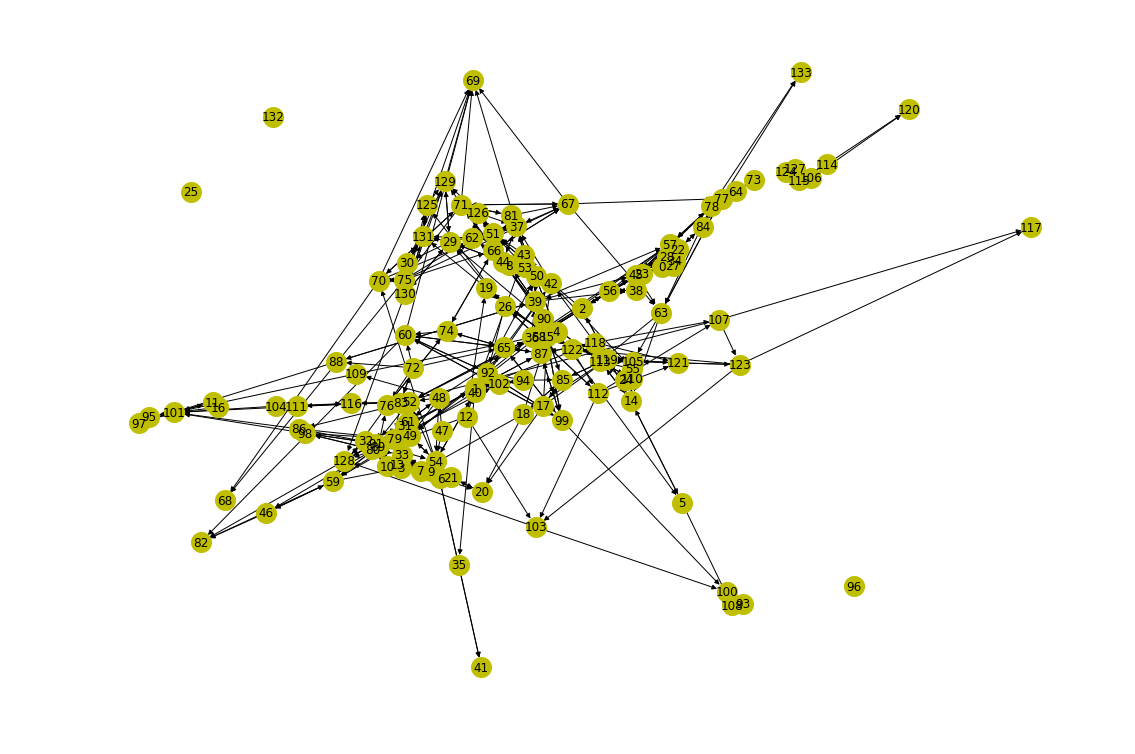

In [14]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G1) 
        
nx.draw(G1_p,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

In [15]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(g2) 
        
nx.draw(g2,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(g3) 
        
nx.draw(g3,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

# In-Degree

In [ ]:
max_g1_in=np.max(list(dict(G1_p.in_degree()).values()))
mean_g1_in=np.mean(list(dict(G1_p.in_degree()).values()))
max_g2_in=np.max(list(dict(G2_p.in_degree()).values()))
mean_g2_in=np.mean(list(dict(G2_p.in_degree()).values()))
max_g3_in=np.max(list(dict(G3_p.in_degree()).values()))
mean_g3_in=np.mean(list(dict(G3_p.in_degree()).values()))
print('Max in degree 1:', max_g1_in,'Mean in degree 1:',mean_g1_in,'Max in degree 2:',max_g2_in,'Mean in degree 2:',mean_g2_in,'Max in degree 3:',max_g3_in,'Mean in degree 3:',mean_g3_in)

# Edges

In [ ]:
print(len(G1_p.edges()),len(G2_p.edges()),len(G3_p.edges()))

In [ ]:
print(nx.average_clustering(G1_p),nx.average_clustering(G2_p),nx.average_clustering(G3_p))

In [16]:
def AssignSex(G,sexos):
    for n in G.nodes:
        G.nodes[n]["sex"] = np.float(sexos[n])
    return


In [17]:
AssignSex(G1_p,sexos)

In [18]:
AssignSex(G2_p,sexos)
AssignSex(G3_p,sexos)

In [19]:
def color(g):
    if g==1:
        col='blue'
    else:                   # definimos una funcion para asignar un color distinto a cada genero
        col='red'
    return col

def color_edge(g):
    if g==1:
        col='green'
    else:                   # definimos una funcion para asignar un color distinto a cada genero
        col='black'
    return col

def size_edge(g):
    if g==1:
        size=4
    else:                   # definimos una funcion para asignar un color distinto a cada genero
        size=1
    return size


In [20]:
134-59

75

In [ ]:
#pos = nx.spring_layout(G1_p)       

plt.figure(figsize=(15,10))
#nx.draw_spring(g1, **options)

#nx.draw(g3,pos,node_size=400,node_color='y',with_labels=True)
#(G[, dim, k, pos, fixed, ...])
 


nx.draw(G=G3_p, 
        pos = pos, 
        node_list = G3_p.nodes(), 
        node_color = [color(g) for g in nx.get_node_attributes(G3_p,'sex').values()], 
        alpha = 0.8, 
        width = [size_edge(g) for g in nx.get_edge_attributes(G3_p,'weight').values()],
        edge_color=[color_edge(g) for g in nx.get_edge_attributes(G3_p,'weight').values()],
        node_size =[10*g**2 for g in list(dict(G3_p.in_degree()).values())])

#plt.legend(handles=[no,poco,medio],prop={'size': 20},loc=3)

plt.show()

# comunidades louvain

In [21]:
def AssingCommunities(G,comunidades,name_coms): #comunidades=lista de diccionarios de comunidades
    for name in name_coms:
        for n in G.nodes():
            G.nodes[n][name]=comunidades[0][n]

In [22]:
def Communities(G,labels,name_coms): #laabels=lista de labels de comunidades
    Communities=[]
    for k in range(len(labels)):
        nodos_por_comunidad=[]
        for i in range(len(set(labels[k]))):
            nodos=[]
            for nodo in G.nodes():
                if i==nx.get_node_attributes(G,name_coms[k])[nodo]:
                    nodos.append(nodo)
            nodos_por_comunidad.append(nodos)
        Communities.append(nodos_por_comunidad)
    return(Communities)

In [23]:
def all_communities(G):
    
    global dict_comun_louvain
    
    dict_comun_louvain = community.best_partition(G)
    labels_louvain=list(dict_comun_louvain.values())
       
    comunidades=[dict_comun_louvain]
    
    global name_coms
    name_coms=['comunidad_louvain']
    
    AssingCommunities(G,comunidades,name_coms)
    
    labels=[labels_louvain]
    
    all_coms=Communities(G,labels,name_coms)
    
    return all_coms

In [24]:
G1_p_copy=G1_p.copy()
G2_p_copy=G2_p.copy()
G3_p_copy=G3_p.copy()

In [25]:
comunidades_louvain_1=all_communities(nx.to_undirected(G1_p_copy))
comunidades_louvain_2=all_communities(nx.to_undirected(G2_p_copy))
comunidades_louvain_3=all_communities(nx.to_undirected(G3_p_copy))

In [ ]:


#pos = nx.spring_layout(G1_p_copy)       

plt.figure(figsize=(15,10))
#nx.draw_spring(g1, **options)

#nx.draw(g3,pos,node_size=400,node_color='y',with_labels=True)
#(G[, dim, k, pos, fixed, ...])
 


nx.draw(G=G3_p_copy, 
        pos = pos,
        cmap=plt.get_cmap('Set1'),
        node_list = G3_p_copy.nodes(), 
        node_color =list(dict(nx.get_node_attributes(G3_p_copy,name_coms[0])).values()), 
        width = [size_edge(g) for g in nx.get_edge_attributes(G3_p_copy,'weight').values()],
        edge_color=[color_edge(g) for g in nx.get_edge_attributes(G3_p_copy,'weight').values()],
        node_size =[50*g**1.5 for g in list(dict(G3_p_copy.in_degree()).values())])

#plt.legend(handles=[no,poco,medio],prop={'size': 20},loc=3)

plt.show()

In [ ]:
help(nx.write_gexf)

# fojo latitude y longitude

In [56]:
posiciones=np.loadtxt('Untitled.gdf', delimiter=',')
y=np.zeros((1,134))
x=np.zeros((1,134))
for i in range(134):
    x[0,i]=10000*posiciones[i,4]
    y[0,i]=10000*posiciones[i,5]
    

In [57]:
inProj=Proj(init='epsg:32632')
outProj=Proj(init='epsg:4326')
long=np.zeros((1,134))
lat=np.zeros((1,134))
for i in range(134):
    long[0,i],lat[0,i]=transform(inProj,outProj,x[0,i],y[0,i])

In [58]:
def AssignCoordinates(G,latitudes,longitudes): 
    for n in range(134):
        G.nodes[n]['latitude']=np.float(latitudes[0,n])
        G.nodes[n]['longitude']=np.float(longitudes[0,n])        
        
       

In [59]:
AssignCoordinates(G1_p_copy,lat,long)
AssignCoordinates(G2_p_copy,lat,long)
AssignCoordinates(G3_p_copy,lat,long)

In [60]:
nx.write_gexf(G1_p_copy,'first.gexf')
nx.write_gexf(G2_p_copy,'second.gexf')
nx.write_gexf(G3_p_copy,'third.gexf')